In [6]:
import pandas as pd

df = pd.read_csv("/Users/sharukat/Downloads/originalDatasetNew.csv")
df.rename(columns={"Id":"question_id"}, inplace=True)
df 

,question_id,Link to Question,How,What Area,Why,What documentation,Which,Unnamed: 7,Unnamed: 8
0,33720645,https://stackoverflow.com/questions/33720645,Mentioning documentation,Model visualisation,DOCUMENTATION REPLICATION ON OTHER EXAMPLES,TensorFlow tutorial,TensorFlow tutorial,NaN,Links outdated or broken
1,34160692,https://stackoverflow.com/questions/34160692,Link to documentation,error/exception,DOCUMENTATION AMBIGUITY,Links outdated or broken,Links outdated or broken,NaN,TensorFlow tutorial
2,34283090,https://stackoverflow.com/questions/34283090,Mentioning documentation,loss function,DOCUMENTATION REPLICATION ON OTHER EXAMPLES,Tensorflow tutorial,TensorFlow tutorial,NaN,TensorFlow GitHub documentation
3,34427209,https://stackoverflow.com/questions/34427209,Mentioning documentation,Optimizer,LACK OF DOCUMENTATION,TensorFlow tutorial,TensorFlow tutorial,NaN,Third-party documentation
4,34782201,https://stackoverflow.com/questions/34782201,Mentioning documentation,error/exception,DOCUMENTATION AMBIGUITY,"Tensorflow tutorial, link to stanford.edu",TensorFlow tutorial,NaN,Scientific paper
...,...,...,...,...,...,...,...,...,...
411,56824409,https://stackoverflow.com/questions/56824409,link to documentation,shap mismatch,DOCUMENTATION REPLICATION ON OTHER EXAMPLES,tensorflow guide,Tensorflow guide,NaN,NaN
412,45655412,https://stackoverflow.com/questions/45655412,mentioning documentation,data adaption,DOCUMENTATION COMPLETENESS,not mentiond,NaN,NaN,NaN
413,49450829,https://stackoverflow.com/questions/49450829,link to documentation,data adaption,DOCUMENTATION COMPLETENESS,3rd party,Third-party documentation,NaN,NaN
414,43755609,https://stackoverflow.com/questions/43755609,link to documentation,error/exception,DOCUMENTATION COMPLETENESS,tensorflow official document,NaN,NaN,NaN


In [4]:
value_counts = df['Which'].value_counts().reset_index()
value_counts.columns = ['Category', 'counts']

# Calculate the percentage
total_counts = value_counts['counts'].sum()
value_counts['percentage'] = (value_counts['counts'] / total_counts) * 100

print(value_counts)

                          Category  counts  percentage
0              TensorFlow tutorial     261       65.25
1        Third-party documentation      46       11.50
2                 Tensorflow guide      28        7.00
3  TensorFlow GitHub documentation      27        6.75
4         Links outdated or broken      26        6.50
5                 Scientific paper       9        2.25
6             Multimedia tutorials       3        0.75


In [5]:
dataset_406 = pd.read_csv("/Users/sharukat/Downloads/finalized_406_annotated_so_questions.csv")
dataset_406 

,Unnamed: 0,question_id,What Area,Why,user_id,expertise_py,expertise_tf
0,0,33720645,Model visualization,Inadequate examples,1715157,beginner,advanced
1,1,34160692,Error/exception,Documentation ambiguity,5654767,novice,advanced
2,2,34283090,Loss function,Inadequate examples,1841986,beginner,advanced
3,3,34427209,Optimizer,Documentation ambiguity,2272798,intermediate,advanced
4,4,35550628,Model creation,Inadequate examples,2305993,intermediate,advanced
...,...,...,...,...,...,...,...
400,400,53000921,Data adaption,Documentation ambiguity,7644642,beginner,beginner
401,401,45655412,Data adaption,Documentation ambiguity,8405618,beginner,advanced
402,402,49450829,Data adaption,Documentation ambiguity,2661973,beginner,beginner
403,403,43755609,Error/exception,Documentation ambiguity,7900457,beginner,advanced


In [8]:
merged_df = dataset_406.merge(df[['question_id', 'Which']], on='question_id', how='left')
merged_df = merged_df[["question_id", "What Area", "Why", "Which", "user_id"]]
merged_df.to_csv("/Users/sharukat/Documents/annotated_so_questions.csv",index=False)
merged_df

,question_id,What Area,Why,Which,user_id
0,33720645,Model visualization,Inadequate examples,TensorFlow tutorial,1715157
1,34160692,Error/exception,Documentation ambiguity,Links outdated or broken,5654767
2,34283090,Loss function,Inadequate examples,TensorFlow tutorial,1841986
3,34427209,Optimizer,Documentation ambiguity,TensorFlow tutorial,2272798
4,35550628,Model creation,Inadequate examples,TensorFlow tutorial,2305993
...,...,...,...,...,...
400,53000921,Data adaption,Documentation ambiguity,Tensorflow guide,7644642
401,45655412,Data adaption,Documentation ambiguity,NaN,8405618
402,49450829,Data adaption,Documentation ambiguity,Third-party documentation,2661973
403,43755609,Error/exception,Documentation ambiguity,NaN,7900457


In [10]:
value_counts = merged_df['Which'].value_counts().reset_index()
value_counts.columns = ['Category', 'counts']

# Calculate the percentage
total_counts = value_counts['counts'].sum()
value_counts['percentage'] = (value_counts['counts'] / total_counts) * 100

print(value_counts)

                          Category  counts  percentage
0              TensorFlow tutorial     255   66.929134
1        Third-party documentation      43   11.286089
2  TensorFlow GitHub documentation      26    6.824147
3                 Tensorflow guide      24    6.299213
4         Links outdated or broken      23    6.036745
5                 Scientific paper       8    2.099738
6             Multimedia tutorials       2    0.524934


In [11]:
value_counts = merged_df['Why'].value_counts().reset_index()
value_counts.columns = ['Category', 'counts']

# Calculate the percentage
total_counts = value_counts['counts'].sum()
value_counts['percentage'] = (value_counts['counts'] / total_counts) * 100

print(value_counts)

                                 Category  counts  percentage
0                     Inadequate examples     261   64.444444
1                 Documentation ambiguity     114   28.148148
2              Documentation completeness      17    4.197531
3                    Not ml documentation       6    1.481481
4           Lack of alternative solutions       3    0.740741
5      Documentation & code discrepancies       2    0.493827
6             Documentation replicability       1    0.246914
7  Requesting (additional) documentations       1    0.246914


In [12]:
value_counts = merged_df['What Area'].value_counts().reset_index()
value_counts.columns = ['Category', 'counts']

# Calculate the percentage
total_counts = value_counts['counts'].sum()
value_counts['percentage'] = (value_counts['counts'] / total_counts) * 100

print(value_counts)

                 Category  counts  percentage
0         Error/exception     101   24.938272
1          Model creation      37    9.135802
2     Parameter selection      35    8.641975
3               Featuring      29    7.160494
4           Data adaption      29    7.160494
5        Method selection      28    6.913580
6     Prediction accuracy      23    5.679012
7             Performance      22    5.432099
8        Model load/store      18    4.444444
9     Model visualization      17    4.197531
10        Custom (non-ml)      14    3.456790
11          Loss function      14    3.456790
12              Optimizer      11    2.716049
13            Model reuse       9    2.222222
14       Model conversion       7    1.728395
15  Output interpretation       5    1.234568
16         Shape mismatch       2    0.493827
17          Data cleaning       1    0.246914
18        Model selection       1    0.246914
19             Robustness       1    0.246914
20                  Setup       1 

In [13]:
grouped_counts = merged_df.groupby(['What Area', 'Why']).size().reset_index(name='counts')
# Calculate total number of occurrences
total_counts = grouped_counts['counts'].sum()

# Add a percentage column
grouped_counts['percentage'] = (grouped_counts['counts'] / total_counts) * 100

# Sort the counts in descending order
sorted_counts = grouped_counts.sort_values(by='counts', ascending=False).reset_index(drop=True)

sorted_counts

,What Area,Why,counts,percentage
0,Error/exception,Inadequate examples,66,16.296296
1,Error/exception,Documentation ambiguity,29,7.160494
2,Model creation,Inadequate examples,22,5.432099
3,Parameter selection,Inadequate examples,21,5.185185
4,Featuring,Inadequate examples,19,4.691358
5,Prediction accuracy,Inadequate examples,19,4.691358
6,Data adaption,Inadequate examples,18,4.444444
7,Method selection,Inadequate examples,17,4.197531
8,Model creation,Documentation ambiguity,15,3.703704
9,Performance,Inadequate examples,15,3.703704


In [1]:
import pandas as pd
df = pd.read_csv("/Users/sharukat/Documents/ResearchYU/Code/doc-customizer-llm/doc_customizer_llm/data/issue_type_train_data_new.csv")
# df = df[['Title', 'Body', 'Issue Type']]
df = df[['MyLabel','Sentence']]
# df = df.rename(columns={'Title':'title', 'Body':'text', 'Issue Type':'label'})
df = df.rename(columns={'Sentence':'text', 'MyLabel':'label'})

classes_to_replace_1 = [
    'Documentation Replication on Other Examples', 
    'Documentation Replicability', 
    'Inadequate Examples']
replacement_class_1 = 'examples_required'

classes_to_replace_2 = [
    'Documentation Ambiguity', 
    'Documentation Completeness']
replacement_class_2 = 'description_only'

classes_to_replace_3 = [
    'Requesting (Additional) Resources', 
    'Lack of Alternative Solutions/Documentation']
replacement_class_3 = 'additional_resources'

# Replace classes in the 'class' column
df['label'] = df['label'].replace(to_replace=classes_to_replace_1, value=replacement_class_1)
df['label'] = df['label'].replace(to_replace=classes_to_replace_2, value=replacement_class_2)
df['label'] = df['label'].replace(to_replace=classes_to_replace_3, value=replacement_class_3)
df = df.dropna()
df

,label,text
0,additional_resources,Is there any documentation that clarifies the...
1,additional_resources,And is there some better documentation for this?
2,additional_resources,If anyone has a better/easier solution please ...
3,additional_resources,Is there any document talk about this relation...
4,additional_resources,Anyone have some input on using multiprocessin...
...,...,...
502,examples_required,"I have the following code: which, based on the..."
503,description_only,According to my understanding of the docs I'v...
504,description_only,It is said in the documentation that the first...
505,examples_required,I try to roll a tensor and in the Tensorflow d...


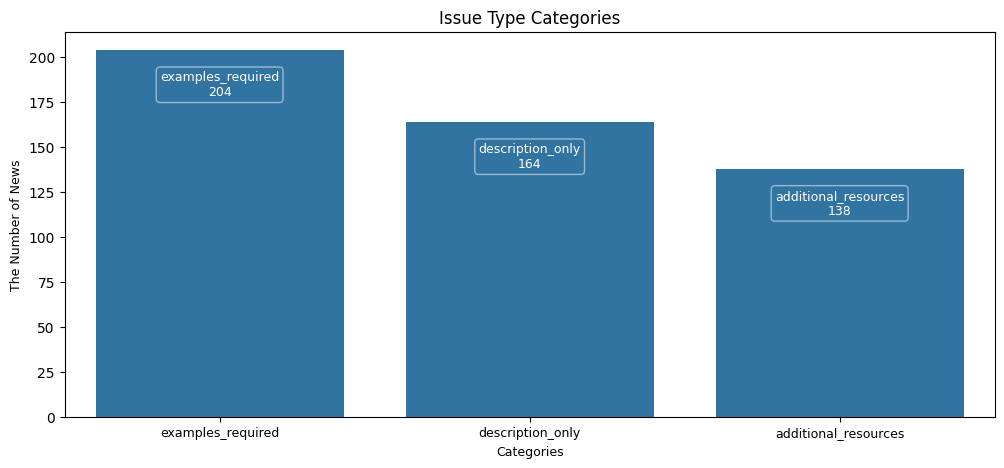

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

category_count = df['label'].value_counts()
categories = category_count.index

fig = plt.figure(figsize= (12, 5))
ax = fig.add_subplot(111)
sns.barplot(x = category_count.index, y = category_count )

for a, p in enumerate(ax.patches):
    ax.annotate(f'{categories[a]}\n' + format(p.get_height(), '.0f'), 
                xy = (p.get_x() + p.get_width() / 2.0, p.get_height()), 
                xytext = (0,-25), size = 9, color = 'white' , 
                ha = 'center', va = 'center', 
                textcoords = 'offset points', 
                bbox = dict(boxstyle = 'round', facecolor='none',edgecolor='white', alpha = 0.5) )
    
plt.xlabel('Categories', size = 9)
plt.ylabel('The Number of News', size= 9)
plt.xticks(size = 9)
plt.title("Issue Type Categories" , size = 12)
plt.show()

# RAGAS Eval Dataset

In [2]:
import os
import pandas as pd
import lib.global_settings as settings

df = pd.read_csv(os.path.join(settings.DATA_PATH, "eval_data_ragas.csv"))
df

,QuestionId,QuestionAPI,IssueType,Title,Question,GroundTruth
0,76324368,tf.keras.layers.Dense,Documentation Replication on Other Examples,Understanding tf.keras.layers.Dense(),<p>I am trying to understand why there is a di...,<p>After some experimentation I realized that ...
1,74005009,tf.data.Dataset,Documentation Replicability,How to create output_signature for tensorflow....,<p>I have a generator yielding data and labels...,<p>if your datagen_row() function yields input...
2,71335830,tf.keras.layers.Flatten,Documentation Ambiguity,What is the difference between tf.keras.layers...,<p>I have seen multiple uses of both <code>tf....,<p>I think the confusion comes from using a <c...
3,71149271,tf.data.Dataset,Documentation Replication on Other Examples,How to remove single feature from tensorflow d...,<p>I created dataset from csv file with datase...,<p>You can remove features by only filtering t...
4,71129505,tf.data.Dataset,Documentation Replication on Other Examples,Is it possible to split a tensorflow dataset i...,<p>I am using <code>tf.keras.utils.image_datas...,<p>The issue is that you are not taking and sk...
5,71019644,tf.where,Documentation Ambiguity,Equivalent tensorflow expression to numpy mask,<p>I have a numpy array named PixelData of unk...,<p>Not sure what <code>PixelData</code> looks ...
6,70880589,tf.data.experimental.cardinality,Lack of Alternative Solutions/Documentation,what does cardinality mean in relation to an i...,<p>After successfully creating a tensorflow im...,"<p>The cardinality, in your case, is simply th..."
7,70747499,tf.map_fn,Documentation Replication on Other Examples,Using tf.map_fn when the function has multiple...,<p>I can easily use tf.map_fn when the functio...,<p>You should make sure you are returning a te...
8,68984841,tf.keras.layers.Dense,Documentation Replicability,How can I understand the kernel of tf.keras.la...,<p>How can I understand the kernel of <code>tf...,"<p>Yes, your understanding is correct.</p>\n<p..."
9,68431633,tf.image.stateless_random_crop,Documentation Ambiguity,tf.image.stateless_random_crop VS. tf.image.ra...,"<p>In tf 2.5, there are two functions for crop...",<p><code>random_crop</code> always return the ...


In [ ]:

# df = df[['Title', 'Body', 'Issue Type']]
df = df[['MyLabel','Sentence']]
# df = df.rename(columns={'Title':'title', 'Body':'text', 'Issue Type':'label'})
df = df.rename(columns={'Sentence':'text', 'MyLabel':'label'})

classes_to_replace_1 = [
    'Documentation Replication on Other Examples', 
    'Documentation Replicability', 
    'Inadequate Examples']
replacement_class_1 = 'examples_required'

classes_to_replace_2 = [
    'Documentation Ambiguity', 
    'Documentation Completeness']
replacement_class_2 = 'description_only'

classes_to_replace_3 = [
    'Requesting (Additional) Resources', 
    'Lack of Alternative Solutions/Documentation']
replacement_class_3 = 'additional_resources'

# Replace classes in the 'class' column
df['label'] = df['label'].replace(to_replace=classes_to_replace_1, value=replacement_class_1)
df['label'] = df['label'].replace(to_replace=classes_to_replace_2, value=replacement_class_2)
df['label'] = df['label'].replace(to_replace=classes_to_replace_3, value=replacement_class_3)
df = df.dropna()
df